# Physics 77, Lecture 1: Introduction to Unix and Python

## Welcome to Physics 77!  (Outline)

Introduction spiel:
* why this course
* goals of this course
* recommendations for how to approach this course
    * learning by doing!

*Learning goals for Physics 77*

The following learning goals will guide the presentation of material as well as development of HWs, rubrics for assessment, and practice problems for use in discussion section.

1. **Use of representations:** Students should be able to move fluidly between verbal descriptions, mathematical representations, visual graphs and tables, and computer code implementations of a physical situation.
1. **Communication:** Students should be able to justify and explain their reasoning, in oral and/or written form, at each step of solving a problem or writing code. Students should particularly be able to clearly and efficiently comment and document code. Students should also be able to communicate and collaborate effectively using state-of-the-art information technologies and appropriate presentational technologies (e.g., Camtasia, PowerPoint).
1. **Tools:** Students should be able to identify and apply appropriate Python libraries and programming techniques to manipulate data, approximate solutions to equations, implement algorithms for simulation, visualize results, and perform other tasks useful to physicists.
1. **Problem-solving:** Students should be able to adaptively identify and apply appropriate mathematical and computational tools and techniques to solve physical problems, model physical systems, and process data from simulations or experiments.
1. **Making connections:** Students should be able to use and relate new concepts and techniques with concepts and techniques developed in earlier courses.
1. **Intellectual maturity and metacognition:** Students should take responsibility for their own learning, for example by identifying areas in which they need additional practice in the course and taking steps to obtain necessary help.
1. **Resourcefulness:** Students should be able to use technology to locate, access, evaluate, and use information, and appropriately cite resources from digital/electronic media.


## Introduction to Unix (Outline)

Commentary on usefulness of command line
* scripts!
* simple user interface
* quick editing
* remote access and navigation
* file permissions

You will learn and practice basic command line tools in the first workshop

[some quick demonstrations]

## Let's learn some python!

## To start: A graphing teaser

In [49]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]


The material here is adapted from Chapter 0 in Eric Ayar's *Computational Physics With Python*

In [53]:
print("Hello world")  # comment me here, limited in what I can write here
print("Hello again")

x = 5
y = x * 5
print(y)

Hello world
Hello again
25


Those of you who know (La)TeX should be able to typeset *math formulae* and equations in the `Markdown` fields. Those who do not know LaTeX should learn it -- useful for the rest of your scientific life ! Let's write a formula:
$sinc(\alpha) = \sin(\alpha)/\alpha$

Let's format an equation:
$$\sqrt{\frac{\pi}{2}}$$

In [59]:
from math import sqrt, sin

alpha = 3.1415/3.
sinc = sin(alpha)/alpha
print(sqrt(sinc))

0.9093970457899014


In [60]:
from math import *

print(log(2))

0.6931471805599453


In [62]:
sqrt(-1)

ValueError: math domain error

In [57]:
from cmath import *

print(sqrt(-1))

1j


In [61]:
print(log(4.))

1.3862943611198906


In [63]:
import math as m
import cmath as cm

x = cm.sqrt(-1)
print(x)

y = m.log(10)
print(y)

1j
2.302585092994046


Now let's pick some points to plot. We'll store the x-values in the variable `x` and the y-values in the variable `y`.

We store the values as arrays, which are a useful data type for math and plotting and working with large collections of numbers. Notice we use numpy to define the array (through it's nickname "np"), since arrays aren't built into python by default.

In [64]:
import numpy as np
x = np.array([1,2,3,4,5,7])
y = x+4

Let's plot it! We need matplotlib.pyplot to do this, which we nicknamed "plt".

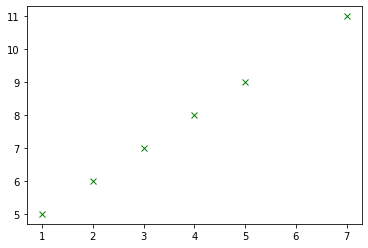

In [65]:
import matplotlib.pyplot as plt
plt.plot(x,y,'gx')

You can give special commands to the IPython Notebook by using the `%` sign. This is NOT python code! It's special code just for the IPython interface.

In [66]:
# if a plot function doesn't show anything, run this and then the plot function again
%matplotlib inline

Matplotlib includes all sorts of functions to clean up and label plots. Let's try some of them:

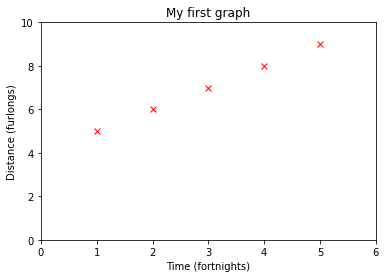

In [67]:
plt.plot(x,y,'rx')
plt.title('My first graph')
plt.xlabel('Time (fortnights)')
plt.ylabel('Distance (furlongs)')
plt.xlim(0, 6)
plt.ylim(0, 10)
plt.savefig("plot.png")

Let's build a fancier plot this time.

let's describe the plot I am about to make

Text(0.5, 0, 'Time (s)')

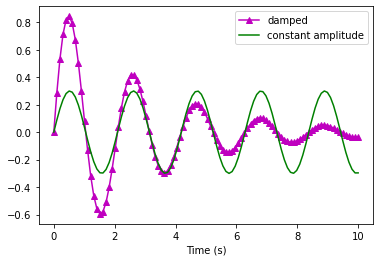

In [68]:
# this linspace function generates 100 values evenly spaced between 0.0 and 10.0
time = np.linspace(0.0, 10.0, 100)
# use exponential and sine functions from numpy to define the y-values (height) from the x-values (time)
height = np.exp(-time/3.0) * np.sin(time*3)
# plot time vs height, with magenta triangles for each point, connected by lines
plt.plot(time, height, 'm-^')
# on the same figure, plot time vs a sinusoid with constant height, and connect the points with green lines
plt.plot(time, 0.3*np.sin(time*3), 'g-')
# add a legend to label the different curves
plt.legend(['damped', 'constant amplitude'], loc='upper right')
# label the x-axis
plt.xlabel('Time (s)')

Python completely ignores any line that begins with `#`. These lines are called 'comments', and *they are a critical part of all of your code*. Notice how we sprinkled comments throughout that code, to make it easier to understand. Code without these comments ...

    time = np.linspace(0.0, 10.0, 100)
    height = np.exp(-time/3.0) * np.sin(time*3)
    plt.plot(time, height, 'm-^')
    plt.plot(time, 0.3*np.sin(time*3), 'g-')
    plt.legend(['damped', 'constant amplitude'], loc='upper right')
    plt.xlabel('Time (s)')
    
... still does exactly the same thing, but if you're new to numpy/matplotlib and didn't write it---or if you wrote it three hours ago and forgot---it might be hard to understand what each part is doing, or what the programmer was thinking at the time.

Descriptive variable names (like `time` and `height`) and comments are critical for understanding, reusing, and debugging code.

Text(0.5, 0, 'Time (s)')

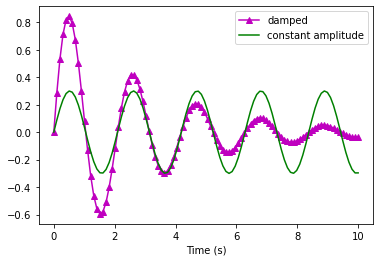

In [69]:
    time = np.linspace(0.0, 10.0, 100)
    height = np.exp(-time/3.0) * np.sin(time*3)
    plt.plot(time, height, 'm-^')
    plt.plot(time, 0.3*np.sin(time*3), 'g-')
    plt.legend(['damped', 'constant amplitude'], loc='upper right')
    plt.xlabel('Time (s)')

#### Importing and graphing real data

Suppose we have a text file with real data, and we want to graph it. We need to find the file, and then we need to import it into python. For convenience, we've already put the file in the same directory as this IPython notebook.

In [ ]:
# pwd tells us which directory we're in (it's a Unix command that IPython understands)
%pwd

In [ ]:
# ls tells us what's in the current directory (another Unix command)
%ls

Let's import this microphones.txt file, which contains three columns of numbers: frequencies, amplitudes of those frequencies from mic1, and amplitudes from mic2. We'll use numpy's `loadtxt` function, a powerful way to load files easily into arrays.

In [70]:
frequency, mic1, mic2 = np.loadtxt('microphones.txt', unpack = True)

In [71]:
print(mic1)
print(len(mic1))

[0.654 0.127 0.12  ... 1.466 1.458 0.125]
2990


Now let's make a labeled plot, commenting our code for clarity:

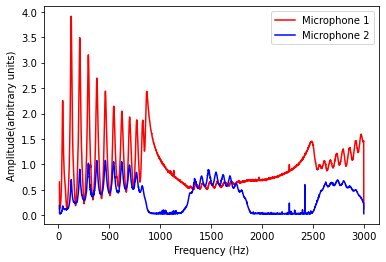

In [72]:
# start a new figure
plt.figure()
# plot frequency vs mic1 amplitude with a red curve, and
#      frequency vs mic2 amplitude with a blue curve
plt.plot(frequency, mic1, 'r-', frequency, mic2, 'b-')
# label the plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude(arbitrary units)')
plt.legend(['Microphone 1', 'Microphone 2'])

Now let's go back to the lecture notes

## Python basics (Outline)

then into Newman Chapter 1:
* arithmetic
* comments
* input
* print and string formatting
* variables
* data types (mention arrays)
* sequence indexing and slicing

Workshop: teaser plotting and practice with variables / data types / arithmetic / manipulating lists and strings

Homework: data types / arithmetic / manipulating lists and strings, emphasis on comments and good variable names

In [73]:
2+2 # addition

4

In [74]:
2-2 # subtraction

0

In [75]:
2*2 # multiplication

4

In [79]:
2/3 # division

0.6666666666666666

In [80]:
2%3  # modulus

2

In [82]:
(7)//2  # floor division

3

In [88]:
10**2 # exponent



100

In [89]:
10*2 # multiplication

20

In [84]:
10^2  # warning: this is not a power operator, this is exclusive OR (bitwise operator)

8

### Assignments and variables

A "variable" is a handle to the data that you can name and manipulate. 
A very common concept in programming ! Actual implementation and propertied depend on the language. In Python, there are 3 basic vairable types: floats (real numbers), ints (discrete integers), and strings (sequences of characters)

In [91]:
import math as m
import cmath as cm

a = 10
b = +50
c = 2

a = a + 10
print(a)

x1 = (-b + m.sqrt(b**2 - 4*a*c))/(2*a)
print (x1)

x_2 = (-b - m.sqrt(b*b - 4*a*c))/(2*a)
print(x_2)

20
-0.04066133775521763
-2.4593386622447824


In [ ]:
x = 27.0
print(type(x))


In [ ]:
y = 5
print(y)
print(type(y))

In [ ]:
str = 'Hello world'
print(type(str))

In [ ]:
str = "Hello world"
print(type(str))

In [ ]:
i = 0xff
print(type(i))
print(i)

Can convert characters to int and vice versa

In [ ]:
i = ord('z')
print(i)
c = chr(70)
print(c)

### Shorthands

In [ ]:
x = 5
#x = x + 6
x+=6
print(x)

In [ ]:
y = 100.
y /= 10.
print(y)
i = 100
i -= 10
print(i)

In [ ]:
i = 1
i++
print(i)

### Integer vs Floating point types

In [ ]:
1/2  # Used to produce 0 in Python 2 ! 

In [ ]:
1//2 # this is how most computer languages would evaluate the expression above !

In [ ]:
1/2+(1./2)

In [ ]:
1./2

### Association rules, order of operations

In [ ]:
(2+2)*4

In [ ]:
(2+2)*2-1/2

### Comments

In [ ]:
# this is a comment

In [ ]:
x = 5 # assign 5 to a variable named "x"

'''

more comments

even more text

I am very verbose

x=7

'''

print(x)

more comments <b>bold text</b> *italics*

In [ ]:
print('Hello world') # with a comment

i = 5

s = 'Hello'

s += ' world'.upper()
print(s)

#### Creating a variable without initial value

A question was asked whether it was possible to "declare" a variable without giving it an initial value. The short answer is no: Python is a "dynamic" language and variables are created on demand, so there is no reason to pre-declare them. Moreover, variables can even change type:

In [ ]:
x = 5
print(type(x), sqrt(x))

x = "Hello"   # changed type on the fly - Python has no problem here
print(type(x))

# But this is a terrible practice -- and can lead to errors like this:
print(sqrt(x))   # oops

If you _must_ declare an unitialized variable for some reason (e.g. to remember that the value has not been assigned yet, similar to a NULL pointer in C), there are a few special values. In Python 2 and 3, you can use the value None. In Python 3, you can use also assign the value ... (Ellipsis). It's mostly used for special features of container classes (e.g. multi-dimensional arrays). Of course, neither value will work for subsequent operations. 

In [ ]:
x = None
print(type(x),x)
y = x + 4
print(y)

In [ ]:
x = ...
print(type(x),x)
y = x + 4
print(y)